In [1]:
from mychem import *

ModuleNotFoundError: No module named 'mychem'

In [4]:
m=Molecule.from_smiles("c1ccccc1O")

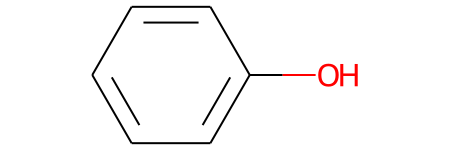

None


In [67]:
s="c1ccc(c(c1)C2=NC(C(=O)Nc3c2cc(cc3)Cl)O)Cl[nH]"

In [50]:
token_list=[]

for c in s:
    if c.isdigit() or c in "rlH]":
        token_list[-1]=token_list[-1]+c
    elif token_list and token_list[-1] in "-:=#[":
        token_list[-1]=token_list[-1]+c        
    else:
        token_list.append(c)

In [51]:
token_list

['c1',
 'c',
 'c',
 'c',
 '(',
 'c',
 '(',
 'c1',
 ')',
 'C2',
 '=N',
 'C',
 '(',
 'C',
 '(',
 '=O',
 ')',
 'N',
 'c3',
 'c2',
 'c',
 'c',
 '(',
 'c',
 'c3',
 ')',
 'Cl',
 ')',
 'O',
 ')',
 'Cl',
 '[CH]']

In [34]:
new_token_list = []

for t in token_list:
    if t[0] in "-:=#" and t[-1].isdigit():
        new_token_list[-1] += t
    else:
        new_token_list.append(t)

In [35]:
token_list

['c1',
 'c',
 'c',
 'c',
 '(',
 'c',
 '(',
 'c1',
 ')',
 'C2',
 '=N',
 'C',
 '(',
 'C',
 '(',
 '=O',
 ')',
 'N',
 'c3',
 'c2',
 'c',
 'c',
 '(',
 'c',
 'c3',
 ')',
 'Cl',
 ')',
 'O',
 ')',
 'Cl']

In [31]:
new_token_list

['c=1-2',
 'c',
 'c',
 'c',
 '(',
 'c',
 '(',
 'c1',
 ')',
 'C2',
 '=N',
 'C',
 '(',
 'C',
 '(',
 '=O',
 ')',
 'N',
 'c3',
 'c2',
 'c',
 'c',
 '(',
 'c',
 'c3',
 ')',
 'Cl',
 ')',
 'O',
 ')',
 'Cl']

In [39]:
eval(str(new_token_list).replace("'(',","[").replace(", ')'","]"))

['c1',
 'c',
 'c',
 'c',
 ['c',
  ['c1'],
  'C2',
  '=N',
  'C',
  ['C', ['=O'], 'N', 'c3', 'c2', 'c', 'c', ['c', 'c3'], 'Cl'],
  'O'],
 'Cl']

In [68]:
s

'c1ccc(c(c1)C2=NC(C(=O)Nc3c2cc(cc3)Cl)O)Cl[nH]'

In [53]:
import re

In [104]:
alternatives = [r"\(",
               r"\)",
               r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
re_token = "("+"|".join(alternatives)+")"

In [105]:
print(re_token)

(\(|\)|([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*))


In [102]:
re_token_re=re.compile(re_token)

In [107]:
tokenized = [s[0] for s in re.findall(re_token,s)]
tokenized

['c1',
 'c',
 'c',
 'c',
 '(',
 'c',
 '(',
 'c1',
 ')',
 'C2',
 '=N',
 'C',
 '(',
 'C',
 '(',
 '=O',
 ')',
 'N',
 'c3',
 'c2',
 'c',
 'c',
 '(',
 'c',
 'c3',
 ')',
 'Cl',
 ')',
 'O',
 ')',
 'Cl',
 '[nH]']

In [119]:
t=str(tokenized).replace("'(',","[").replace("')'","]")
t

"['c1', 'c', 'c', 'c', [ 'c', [ 'c1', ], 'C2', '=N', 'C', [ 'C', [ '=O', ], 'N', 'c3', 'c2', 'c', 'c', [ 'c', 'c3', ], 'Cl', ], 'O', ], 'Cl', '[nH]']"

In [120]:
eval(t)

['c1',
 'c',
 'c',
 'c',
 ['c',
  ['c1'],
  'C2',
  '=N',
  'C',
  ['C', ['=O'], 'N', 'c3', 'c2', 'c', 'c', ['c', 'c3'], 'Cl'],
  'O'],
 'Cl',
 '[nH]']

In [116]:
[7,]

[7]

In [121]:
atom_numbers={'C':6,'N':7}

In [ ]:
def build_molecule(mol,previous,liste):
    for atom_token in liste:
        if atom_token is list:
            build_molecule(mol,previous,atom_token)
        else:
            whole,bond_symbol,atom_symbol,ring_closures=re.match(re_token,atom_token).groups()
        atom= mol.add_atom(atom_numbers[atom_symbol])
            add_bond to previous

            previous = atom

In [ ]:
mol=Molecule.empty()
build_molecule(mol,None,nested_list)
mol

In [123]:
re.match(re_token,"=C1").groups()

('=C1', '=', 'C', '1')